In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('final_dataset.csv')

### **Общая информация**

In [3]:
data.head(3)

,Unnamed: 0,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,netustm,nwspol,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,0,50014,65,5,1,4,8,AT,180,90,...,5,5,6,9,10,5,1,6,6,8
1,1,50030,21,0,2,7,9,AT,570,90,...,2,2,6,6,4,1,1,2,7,10
2,2,50057,53,8,2,4,9,AT,30,30,...,4,3,7,5,8,4,1,6,6,5


In [24]:
data = data.drop('Unnamed: 0', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idno       40156 non-null  int64  
 1   agea       40156 non-null  int64  
 2   rlgdgr     40156 non-null  int64  
 3   polintr    40156 non-null  int64  
 4   sclmeet    40156 non-null  int64  
 5   happy      40156 non-null  int64  
 6   cntry      40156 non-null  object 
 7   netustm    40156 non-null  int64  
 8   nwspol     40156 non-null  int64  
 9   pplfair    40156 non-null  int64  
 10  health     40156 non-null  int64  
 11  sclmeet.1  40156 non-null  int64  
 12  atchctr    40156 non-null  int64  
 13  aesfdrk    40156 non-null  int64  
 14  dscrgrp    40156 non-null  int64  
 15  pray       40156 non-null  int64  
 16  hhmmb      40156 non-null  int64  
 17  gndr       40156 non-null  int64  
 18  yrbrn      40156 non-null  int64  
 19  impdiffa   40156 non-null  int64  
 20  impfun

In [5]:
# явные дубликаты
data.duplicated().sum()

0

In [6]:
# признаки: cptppola, trstprl, trstlgl, trstplc, trstplt, vote, stfeco, stfdem, stfedu
data[['cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'vote', 'stfeco', 'stfdem', 'stfedu']].describe()

,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
count,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000
mean,2.289048,6.204627,7.045821,7.221561,4.945413,1.381886,5.935228,7.749278,8.796892
std,1.270549,11.652521,11.209156,7.636108,10.279775,0.841324,10.759571,14.406229,16.685319
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,5.000000,2.000000,1.000000,3.000000,3.000000,4.000000
50%,2.000000,5.000000,6.000000,7.000000,4.000000,1.000000,5.000000,5.000000,6.000000
75%,3.000000,7.000000,8.000000,8.000000,6.000000,2.000000,6.000000,7.000000,7.000000
max,9.000000,99.000000,99.000000,99.000000,99.000000,9.000000,99.000000,99.000000,99.000000


In [7]:
data['cptppola'].unique()

array([5, 2, 3, 4, 1, 8, 7, 9])

### **Пропущенные значения**

In [11]:
replace = {
    'cptppola': [7, 8, 9],
    'trstprl': [77, 88, 99],
    'trstlgl': [77, 88, 99],
    'trstplc': [77, 88, 99],
    'trstplt': [77, 88, 99],
    'vote': [7, 8, 9],
    'stfeco': [77, 88, 99],
    'stfdem': [77, 88, 99],
    'stfedu': [77, 88, 99]
    }

In [12]:
for features, values in replace.items():
        data[features] = data[features].replace(values, np.nan)

In [20]:
missing_counts = {features: data[features].isnull().sum() for features in replace.keys() if features in data.columns}
print("Количество пропущенных значений:")

for features, count in missing_counts.items():
    share = round(count / 40156 * 100)
    print(f"{features}: {count}, доля от всех данных: {share}%")

Количество пропущенных значений:
cptppola: 579, доля от всех данных: 1%
trstprl: 775, доля от всех данных: 2%
trstlgl: 730, доля от всех данных: 2%
trstplc: 333, доля от всех данных: 1%
trstplt: 592, доля от всех данных: 1%
vote: 360, доля от всех данных: 1%
stfeco: 659, доля от всех данных: 2%
stfdem: 1244, доля от всех данных: 3%
stfedu: 1681, доля от всех данных: 4%


### **Распределения**

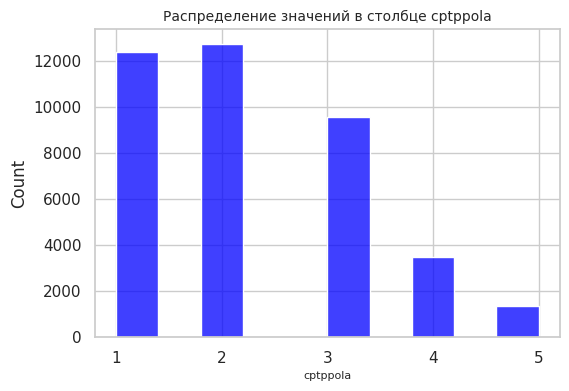

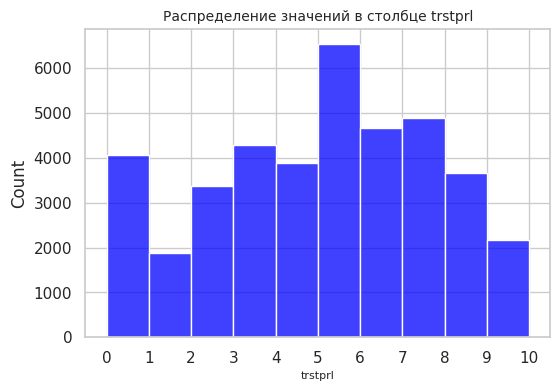

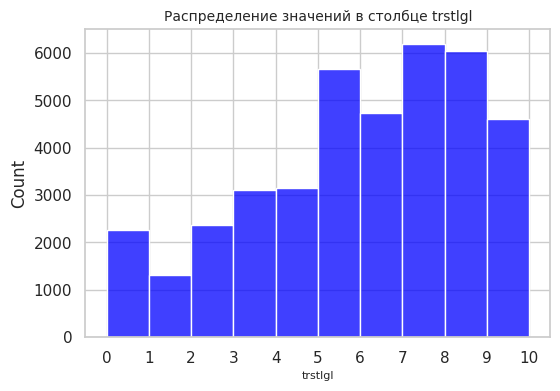

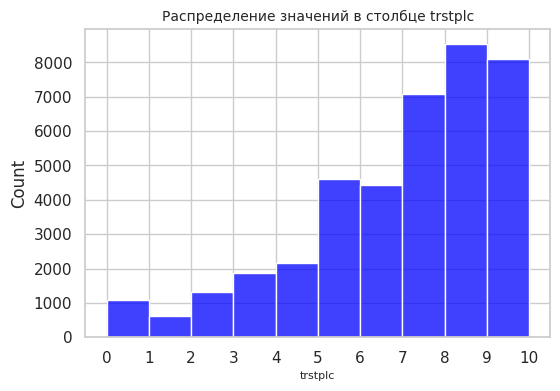

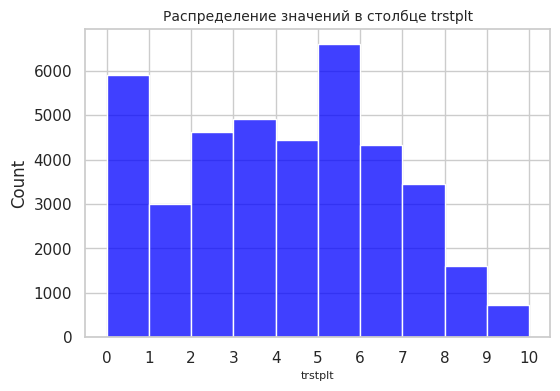

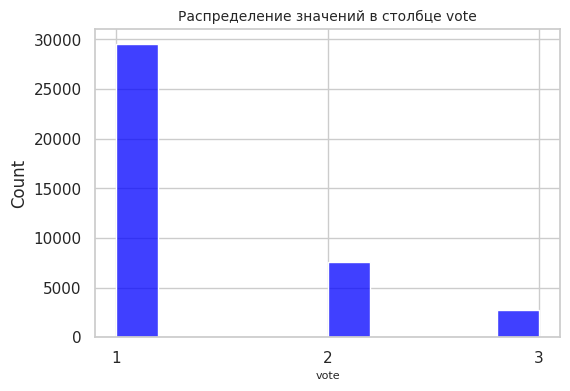

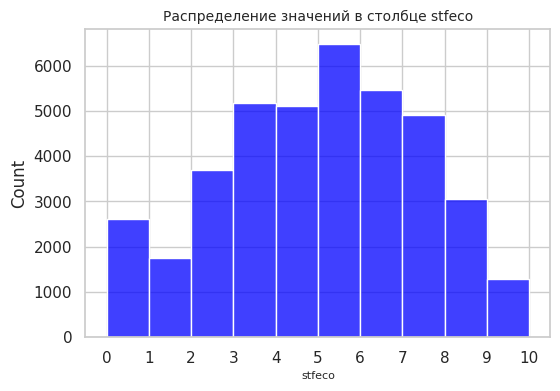

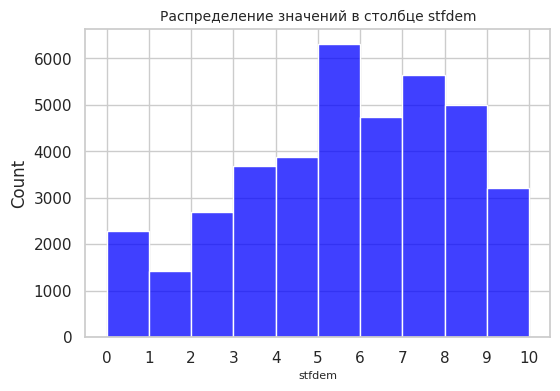

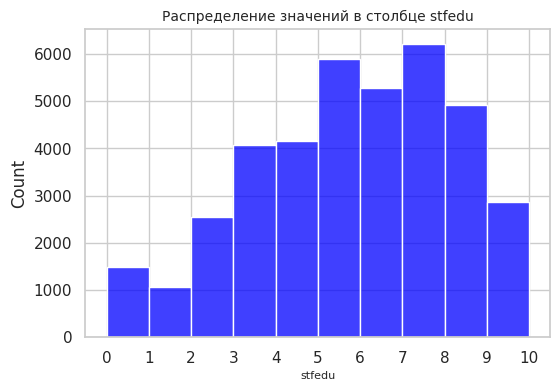

In [35]:
columns_to_plot = ['cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'vote', 'stfeco', 'stfdem', 'stfedu']


for column in columns_to_plot:
    plt.figure(figsize=(6, 4))

    sns.histplot(data[column], bins=10, color='blue')

    plt.title(f'Распределение значений в столбце {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.xticks(range(int(data[column].min()), int(data[column].max()) + 1))

    plt.show()

### **Корреляции**

In [26]:
data[['happy', 'cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'vote', 'stfeco', 'stfdem', 'stfedu']].corr()

,happy,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
happy,1.000000,0.041749,0.056185,0.062348,0.083404,0.045388,-0.016658,0.081610,0.067955,0.067556
cptppola,0.041749,1.000000,0.222744,0.196390,0.100104,0.211870,-0.097760,0.136117,0.161067,0.049713
trstprl,0.056185,0.222744,1.000000,0.641979,0.485540,0.748964,-0.024596,0.511774,0.618568,0.407098
trstlgl,0.062348,0.196390,0.641979,1.000000,0.655725,0.583815,-0.022521,0.410448,0.533479,0.379324
trstplc,0.083404,0.100104,0.485540,0.655725,1.000000,0.462691,-0.043153,0.338044,0.440263,0.342930
trstplt,0.045388,0.211870,0.748964,0.583815,0.462691,1.000000,-0.025442,0.504453,0.584084,0.402568
vote,-0.016658,-0.097760,-0.024596,-0.022521,-0.043153,-0.025442,1.000000,0.034036,0.019583,0.061146
stfeco,0.081610,0.136117,0.511774,0.410448,0.338044,0.504453,0.034036,1.000000,0.598788,0.461786
stfdem,0.067955,0.161067,0.618568,0.533479,0.440263,0.584084,0.019583,0.598788,1.000000,0.504061
stfedu,0.067556,0.049713,0.407098,0.379324,0.342930,0.402568,0.061146,0.461786,0.504061,1.000000


Text(0.5, 1.0, 'Матрица корреляций')

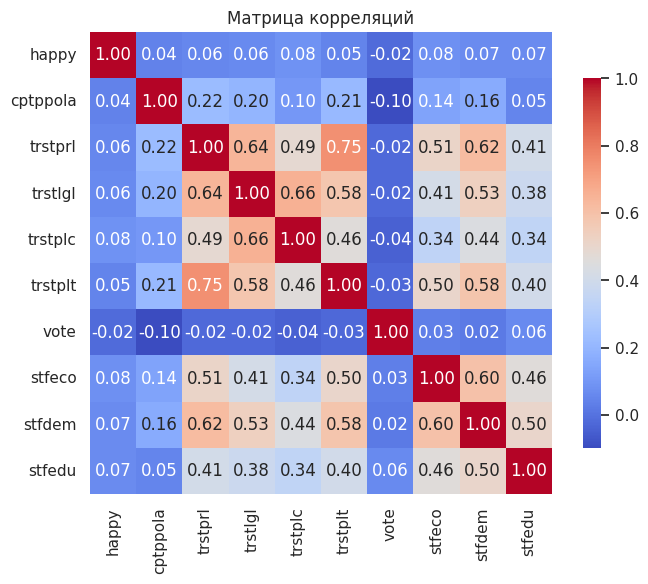

In [38]:
correlation_matrix = data[['happy', 'cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'vote', 'stfeco', 'stfdem', 'stfedu']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Настраиваем заголовок
plt.title('Матрица корреляций', fontsize=12)
